# EDA usando tydiverse

Nesse caderno realizaremos uma Análise Exploratória de Dados (EDA) usando o pacote `tydiverse` do R. Esse pacote contém praticamente todas a ferramentas necessárias para realizar um bom EDA. 

A EDA que realizaremos aqui será bem simples e usará um conjunto de dados nativo do R referente a diamantes.

## 0 - Importação do pacote e dos dados

In [2]:
# Importação do pacote e carregamento
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# Carregando dados
data("diamonds")

## 1 - Distribuições de variáveis

In [4]:
# Vendo o nome das colunas
colnames(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [5]:
# Visualizando amostra dos dados
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


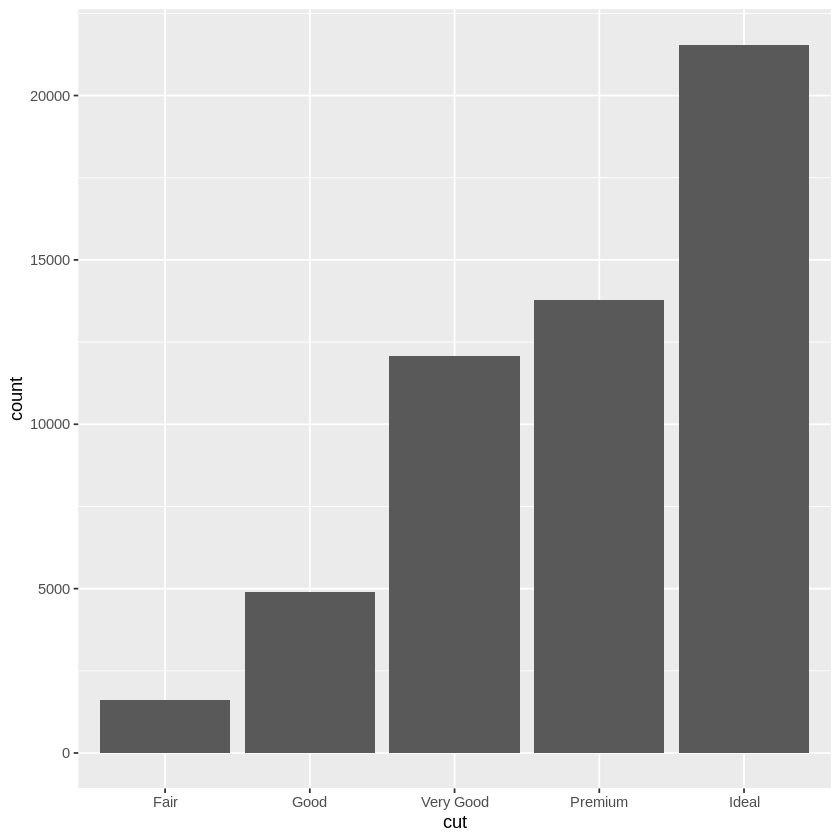

In [6]:
# Plotando distribuição da variável cut, que é categórica
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut))

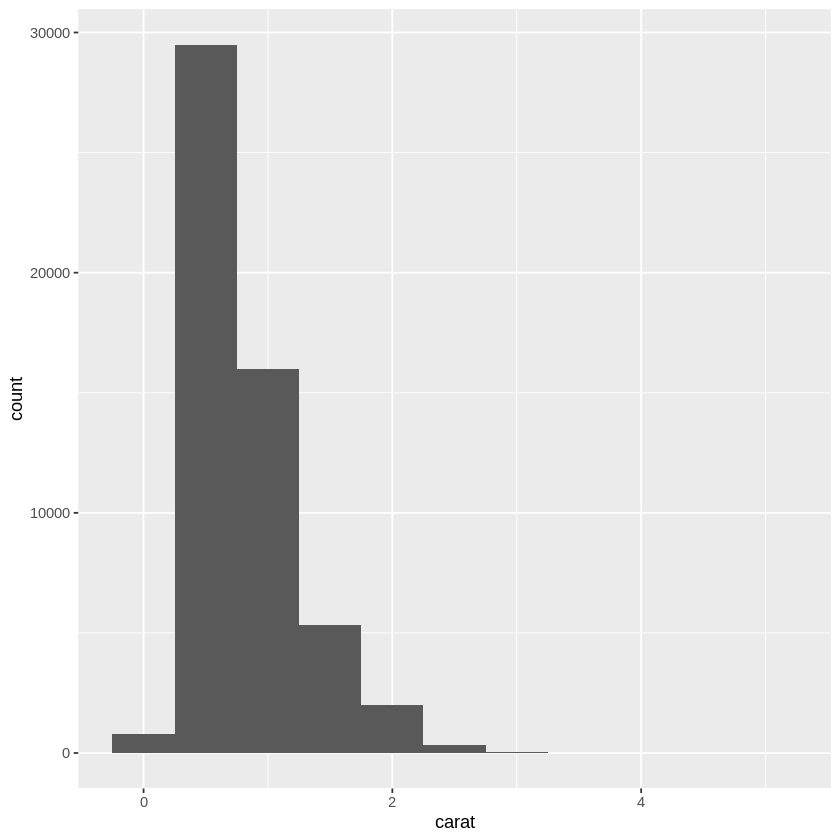

In [8]:
# Plotando distribuição da variável carat em barras com bins de tamanho 0.5
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

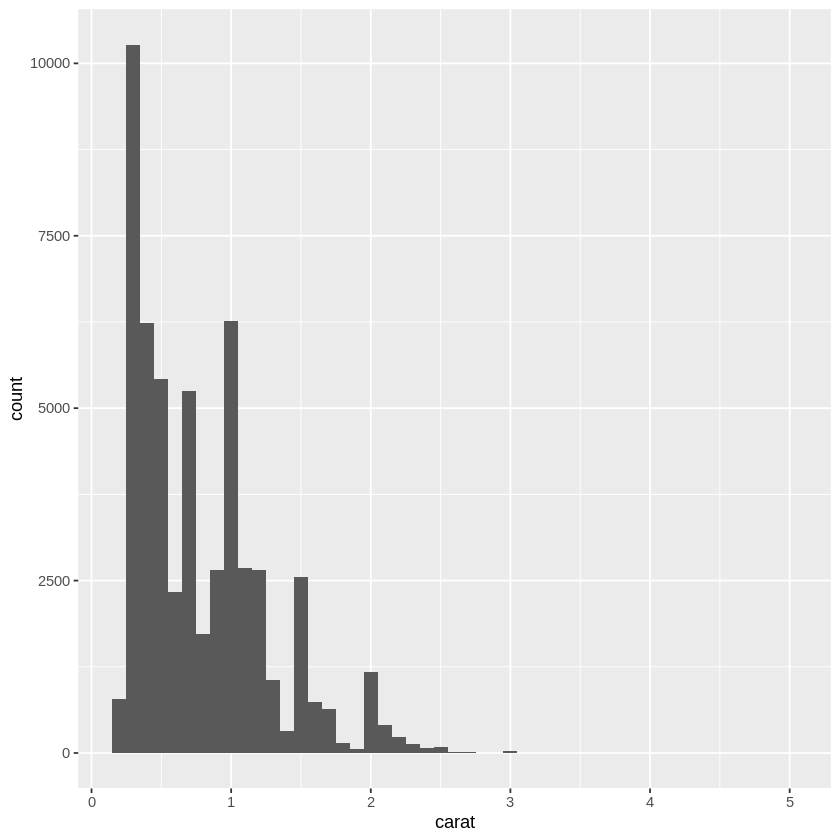

In [9]:
# Plot da mesma distribuição do gráfico acima mas com bins de tamanho 0.1
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = carat), binwidth = 0.1)

In [21]:
# Contabilizando como tabela a quantidade de linhas em cada intervalo
count(diamonds, cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


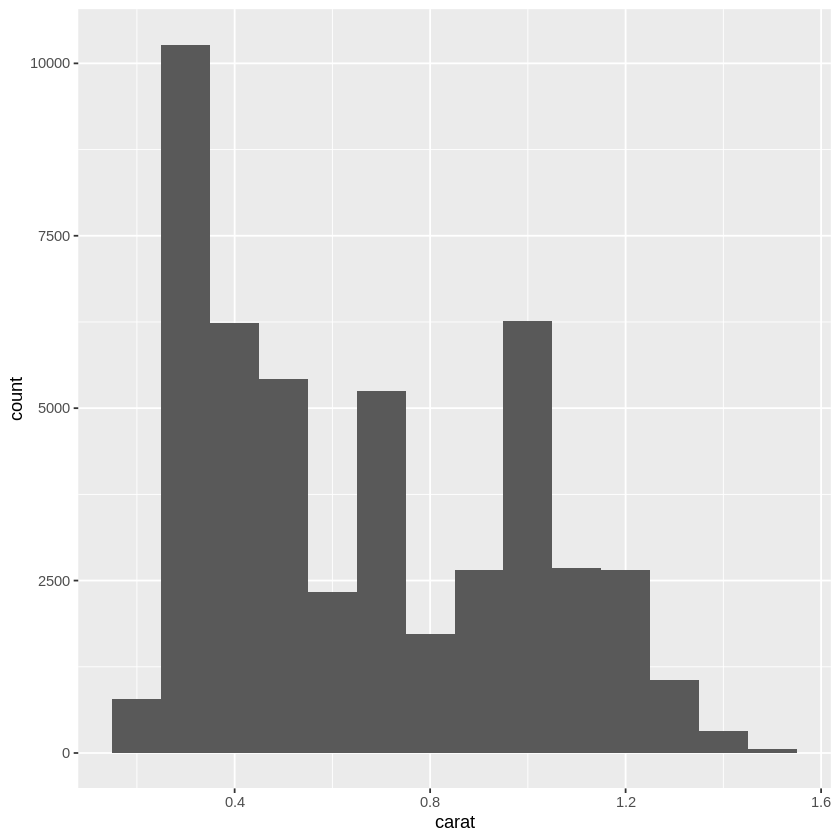

In [17]:
# Só visualizando as linhas com carat menor que 1.5
smaller <- filter(diamonds, carat < 1.5)
ggplot(data = smaller, mapping = aes(x = carat)) + geom_histogram(binwidth = 0.1)

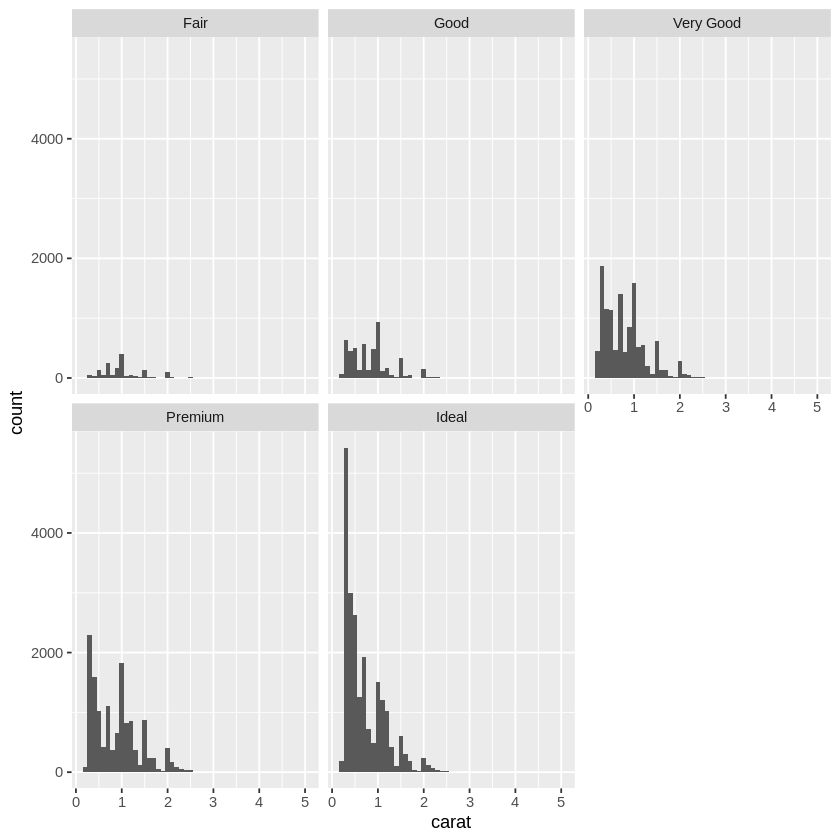

In [22]:
# Verificando como é a distribuição da variável carat para cada valor da variável cut
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = carat), binwidth = 0.1) + facet_wrap(~cut)

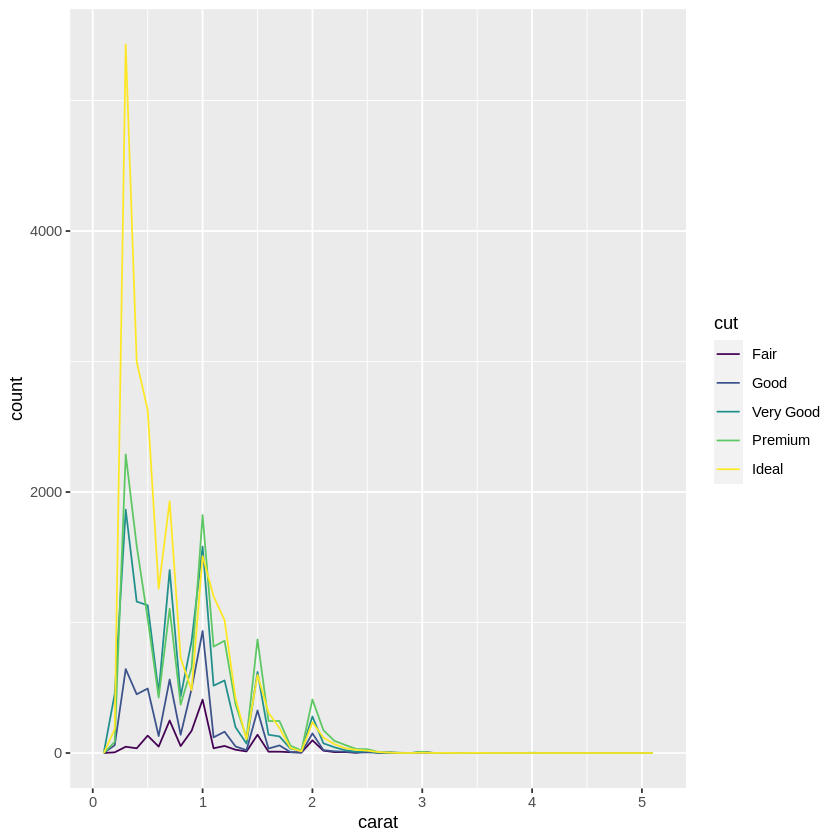

In [23]:
# Criando uma visualização de linha para distribuição de carat
# Cada linha representa um valor de cut
ggplot(data = diamonds, mapping = aes(x = carat, colour = cut)) + geom_freqpoly(binwidth = 0.1)

## 2 - Covariância entre variáveis

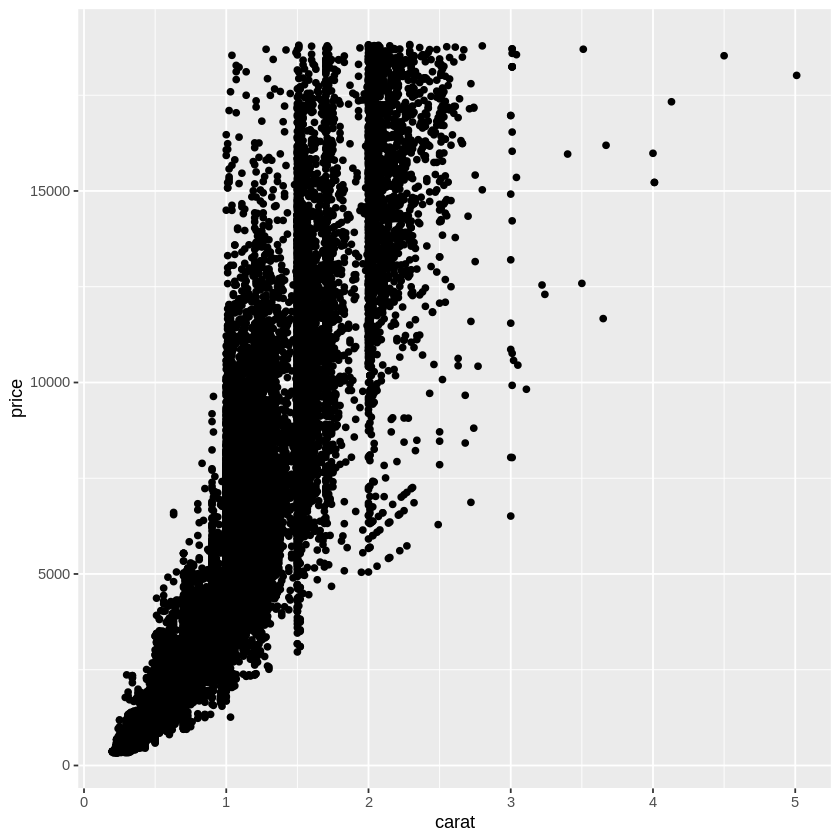

In [24]:
# Plotando a distribuição de price com base em cut
ggplot(data = diamonds) + geom_point(mapping = aes(x = carat, y = price))

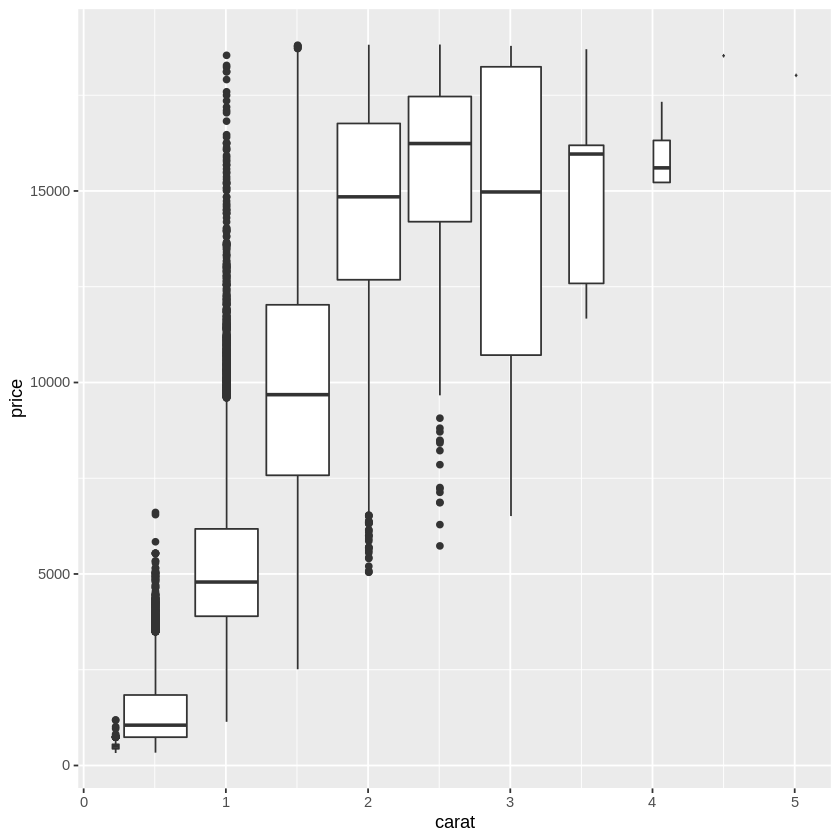

In [25]:
# O gráfico acima pode não ser tão clara devido ao overplott
# Como alternativa vamos usar uma visualização de boxplot
# Numérica X Numérica
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) + 
geom_boxplot(mapping = aes(group = cut_width(carat, 0.5)))

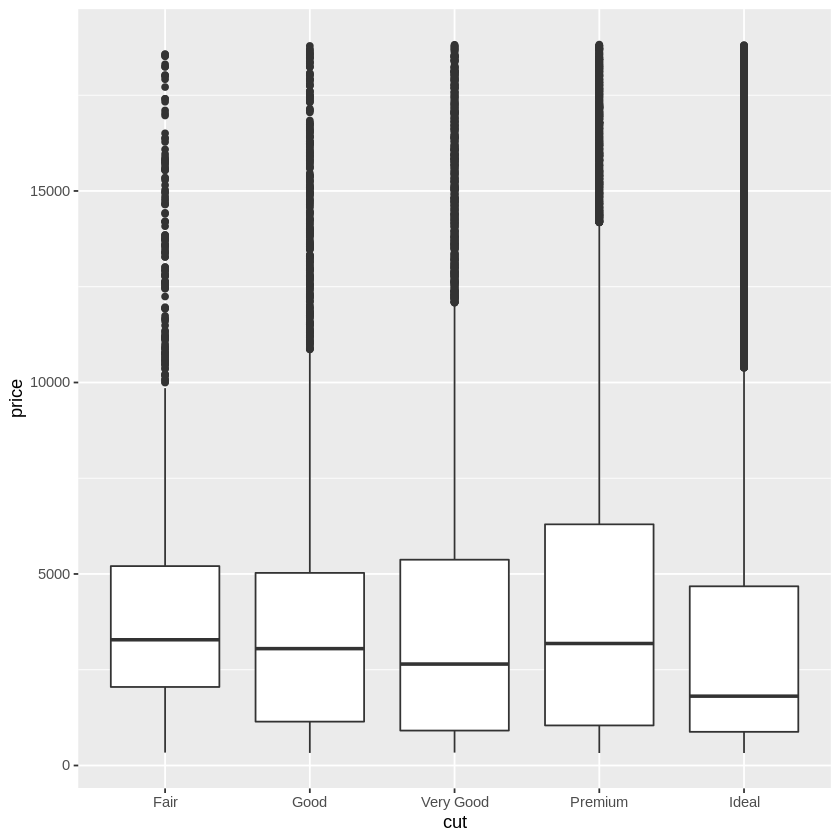

In [32]:
# Boxplot que relaciona price com cut
# Numérica X Categórica
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) + 
geom_boxplot(mapping = aes(group = cut))

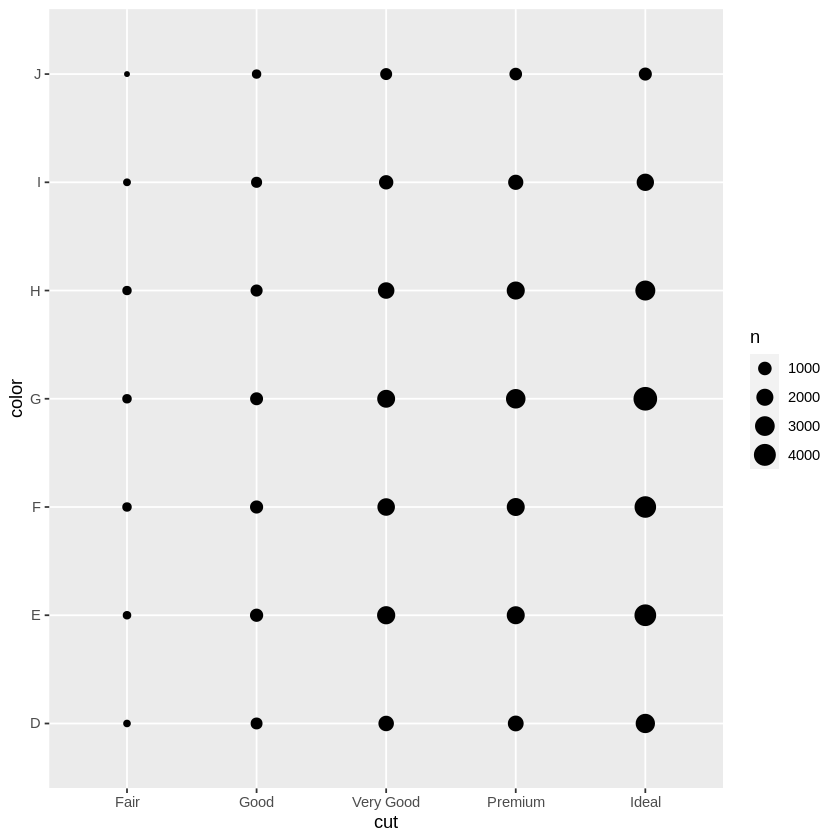

In [33]:
# Usando visusalização de mapa para visualizar relação de cut com color
ggplot(data = diamonds) +
geom_count(mapping = aes(x = cut, y = color))

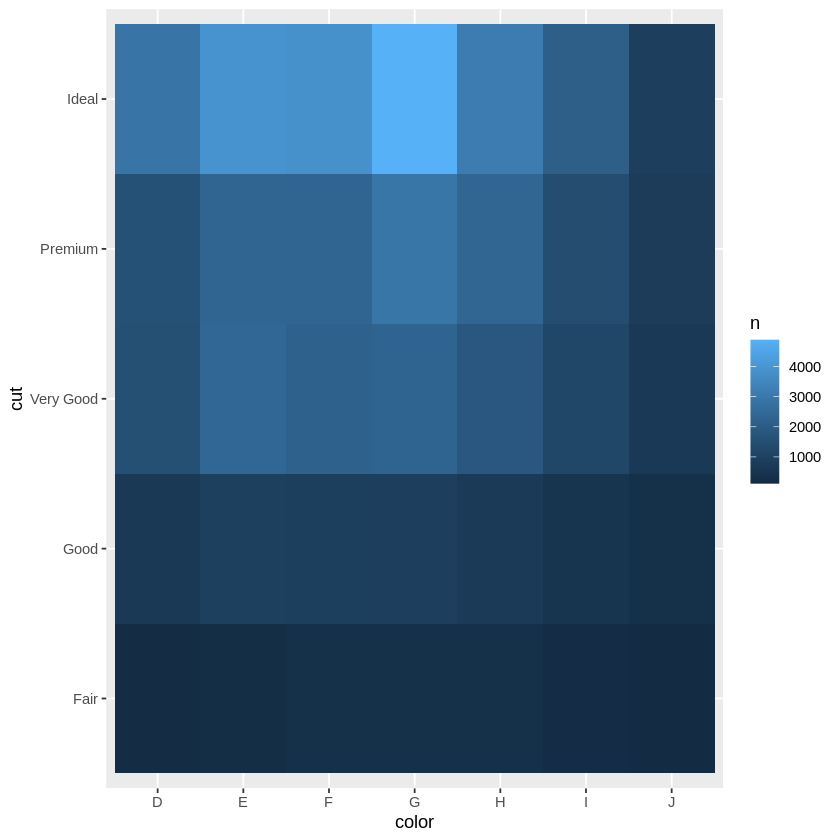

In [35]:
# Usando um heamap para realizar a mesma visualização do último gráfico
ggplot(data = count(diamonds, color, cut), mapping = aes(x = color, y = cut)) +
geom_tile(mapping = aes(fill = n))

## 3 - Correlação entre variáveis

In [26]:
# Importando o corrplot
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



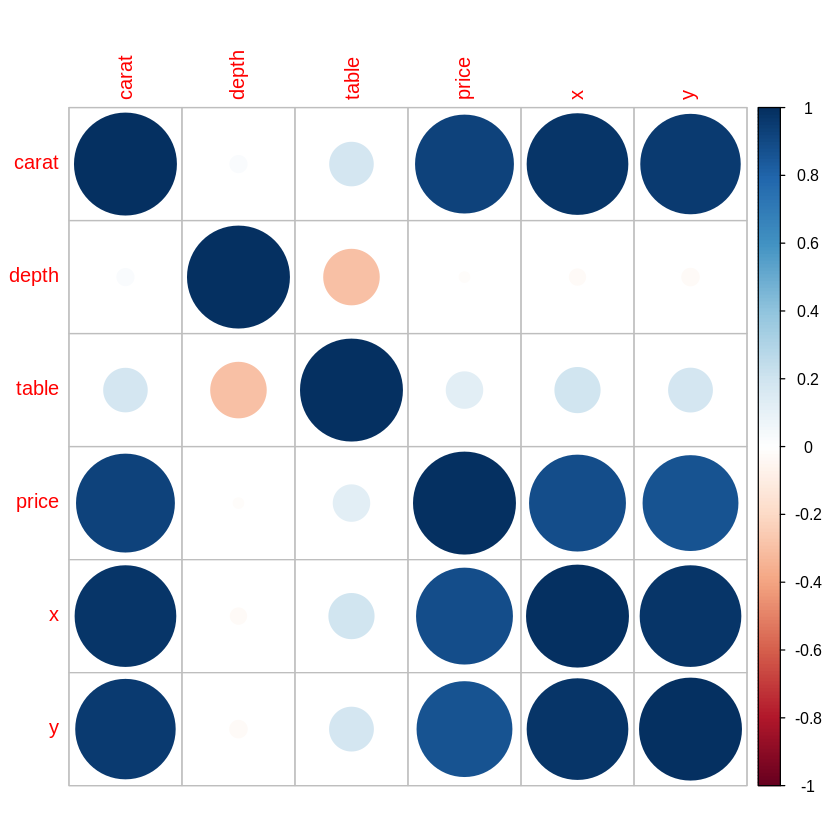

In [31]:
# Criando matriz de correlações entre variáveis e plotando os valores
D <- cor(diamonds[,c(1, 5,6,7,8,9)])
corrplot(D)